# Implementación de:

1. Exhaustive search
2. Half interval divison
3. Fibonacci
4. Golden section

In [1]:
import math

In [2]:
def f(x):
    if x==0:
        return 0.65-(0.75/(1 + x**2))
    else:
        return 0.65-(0.75/(1 + x**2)) -0.65*x*math.atan(1/x)

In [6]:
a,b = 0.0,3.0

#Precisión al 0.001
n = 2*(b-a)/0.001
n #---> cantidad de iteraciones 

6000.0

In [17]:
def Exhaustive_search(a,b,n):
    x1 = a
    aumento = (b-a)/n
    x2 = x1+aumento
    x3 = x2+aumento
    
    f1 = f(x1)
    f2 = f(x2)
    control = 2
    while x3<=b:
        f3 = f(x3)
        if f1>=f2 and f2<=f3:
            return ((x1,x2), control)
        x1 = x2
        x2 = x3
        x3 += aumento
        f1 = f2
        f2 = f3
        control += 1
    return "MINIMUM NOT FOUND"

In [18]:
Exhaustive_search(a,b,n)

((0.48050000000000037, 0.48100000000000037), 963)

In [45]:
def Intervalos_mitad(a,b,epsilon):
    xm = (a+b)/2
    L = abs(b-a)
    control = 1
    
    while L>epsilon:
        x1 = a + L/4.0
        x2 = b - L/4.0

        f1 = f(x1)
        fm = f(xm)
        f2 = f(x2)
        
        #print(f1,fm,f2)
        if f1 < fm: #el mínimo está del lado izquierdo
            b = xm
            xm = x1
            control += 2
        elif f2 <fm: #el mínimo está del lado derecho
            a = xm
            xm = x2 
            control += 2
        else: #el mínimo está en medio
            a = x1 
            b = x2
            control +=2
        L = abs(b-a)        
    return (a,b), control

In [46]:
Intervalos_mitad(a,b,0.001)

((0.48046875, 0.481201171875), 25)

In [273]:
def fibonacci_m(m):
        ls = [1,1]
        for i in range(m):
            ls.append(ls[-1] + ls[-2])
        return ls[m]

def Fibonacci_search(a,b,n):
    k = 2
    L = abs(b-a)
    
    L_estrella = (fibonacci_m(n-k)/fibonacci_m(n))*L
    x1 = a + L_estrella
    x2 = b - L_estrella

    f1 = round(f(x1),7) #estoy utilizando redondeo a 7 posiciones
    f2 = round(f(x2),7)
    evals = 2
    while k<n:
        L_estrella = (fibonacci_m(n-k)/fibonacci_m(n))*L
        
        if f1>f2:
            a = x1 
            
            f1 = f2
            x1 = x2
            x2 = b - L_estrella
            f2 = round(f(x2),7)
            evals += 1
        else:
            b = x2
            
            f2 = f1
            x2 = x1
            x1 =a + L_estrella
            f1 = round(f(x1),7)
            evals += 1
            
        k += 1
    return (round(a,4),round(b,3)), evals

In [271]:
n = abs(b-a)/0.001
n

3000.0

In [274]:
Fibonacci_search(a,b,18)

((0.4793, 0.481), 18)

In [259]:
def Golden_section(a,b,epsilon):
    def denormalize(w, a, b):
        return (w*(b-a))+ a
    
    aw = 0
    bw = 1
    Lw = 1
    
    w1 = round(aw + 0.618*Lw, 10)
    w2 = round(bw - 0.618*Lw, 10)

    f1 = round(f(denormalize(w1, a, b)),10)
    f2 = round(f(denormalize(w2, a, b)),10)
    control = 2
    
    
    if f1 < f2:
        aw = w2
    else:
        bw = w1
        
    Lw = bw-aw
    while Lw > (epsilon/abs(b-a)):
        w1 = round(aw + 0.618*Lw, 10)
        w2 = round(bw - 0.618*Lw, 10)
        if f1<f2:
            aw = w2
            
            w2 = round(bw - 0.618*Lw, 10)
            f2 = round(f(denormalize(w2, a, b)),10)
            
        else:
            bw = w1
            
            w1 = round(aw + 0.618*Lw, 10)
            f1 = round(f(denormalize(w1, a, b)), 10)
            
        control += 1
        Lw = bw-aw

    return ((round(aw,4)*(b-a))+a, (round(bw,5)*(b-a))+a), control

In [260]:
Golden_section(a,b,0.001)

((0.4806, 0.48153), 18)

# Validate manually the amount of evaluations made per algorithm fiven the precision 

## Exhaustive Search

$$Precision = 0.001$$ within an interval of (0,3)

$$∆x = \frac{(b-a)}{n} = \frac{(3-0)}{n} = \frac{3}{n}$$ wich is the size of the intervale returned by the algorithm.

We know that: 
$$2*∆x = Precision$$

Then:

$$2* \frac{3}{n} = 0.001$$ with the number of iterations as variable to search: 

$$n = \frac{2*(3)}{0.001} = 6000$$

Then: **6,000 evaluations of the function**


## Interval Division per Half

Given the size of the interval L remaining after n-iterations and the precision wanted: 
$$Precision = L*\frac{1}{2}^\frac{n}{2} = 0.001$$ 

Having n as our variable:
$$\frac{0.001}{L} = \frac{1}{2}^\frac{n}{2}$$

Solving for n: as L=3
$$n = 2* \frac{log{0.001/3}}{log{\frac{1}{2}}} \approx 23.101493570766486...$$

Then: **23 evaluations of the function**


## Fibonacci

Let the size of our interval of interest be the following for a given k=n:

$$L = L*\frac{F_{k-n+1}}{F_{n}} = L*\frac{F_{n-n+1}}{F_{n}} = L*\frac{F_{1}}{F_{n}}$$ (1)

And, as definition of the Fibonacci evaluation:

$$F_{0} = F_{1} = 1$$

Ecuation (1) would be:

$$L = \frac{L}{F_{n}}$$

Though we know that L=(b-a) = 3 and we also know that the precision we are looking for is 0.001, meaning the size of the interval we will have at the end:

$$\frac{3}{F_{n}} = 0.001$$

$$Fn = \frac{3}{0.001} >= 3000$$  (2)

As Fibonacci Search does one evaluation per iteration, we are looking for the n where (2) is true: [1,1,2,3,5,8,13,21,34,55,89,144,233,377,610,987,1597,2585,4182]

$$F_{n} \approx 3000 : n=18$$

Then: **19 evaluations will be the most as we should not be having things smaller than 3,000**

## Golden Search

After n-evaluations of the target function, if we are considering the orginal itnerval (a,b), the remaining interval witll be size:

$$(b-a)*τ^{(n-1)}$$

As thinking about the precision as the final interval size:

$$Precision = (b-a)*τ^{(n-1)}$$

Solving for n:

$$n = \frac{log{\frac{Precision}{(b-a)}}}{log{0.618}} +1$$

Then: **18 will be the most iterations**

# Plot the function in the given interval

In [48]:
import matplotlib.pyplot as plt
import numpy as np

In [52]:
xpoints = np.arange(a,b,0.001)
ypoints = [f(x) for x in xpoints]

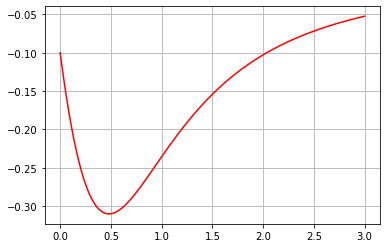

In [55]:
fig, ax = plt.subplots()
ax.plot(xpoints,ypoints, color="r")
ax.grid()

# Which method is the most efficient? Why?

Given the fractional reduction bellow, the four methods used here will be evaluated to see how small did the initial interval can become with specific amounts of iterations. This is an indicator of how much precision we will have at the moment of using an optimization method. 

$$Fractional Reduction(N) = \frac{L_{N}}{L_{0}}$$

The numerator is already given for each method when obtaining the number of iterations but will be desplayed bellow:

- Exhaustive Search: $$L_{N} = \frac{2*L_{0}}{N}$$ (1)
$$RF(N) = \frac{\frac{2*L_{0}}{N}}{L_{0}} = \frac{2}{N}$$ (2)
- Halves Interval Division: $$L_{N} = \frac{1}{2}^{\frac{N}{2}} *L_{0}$$ (1)
$$RF(N) = \frac{\frac{1}{2}^{\frac{N}{2}} *L_{0}}{L_{0}} = \frac{1}{2}^{\frac{N}{2}} $$ (2)
- Fibonacci: $$L_{N} = \frac{L_{0}}{F_{N}}$$ (1)
$$RF(N) = \frac{\frac{L_{0}}{F_{N}}}{L_{0}} = \frac{1}{F_{N}}$$ (2)
- Golden Section: $$L_{N} = (0.618)^{N-1} *L_{0}$$ (1)
$$RF(N) = \frac{(0.618)^{N-1} *L_{0}}{L_{0}} = (0.618)^{N-1}$$ (2)

In [275]:
def RF_es(N):
    return 2/N

def RF_hid(N):
    return (0.5)**(N/2)

def RF_fib(N):
    return 1/fibonacci_m(N)

def RF_gold(N):
    return 0.618**(N-1)

Displaying Fractionl Reduction for 5, 10, 15, 20, 50, 80, 100, 500:

In [296]:
Iteraciones = [5, 10, 15, 20, 50, 80, 100, 500]

In [297]:
es = []
hid = []
fib = []
gold = []
for i in Iteraciones:
    es.append(RF_es(i))
    hid.append(RF_hid(i))
    fib.append(RF_fib(i))
    gold.append(RF_gold(i))

In [298]:
import pandas as pd

In [299]:
Reducciones1 = pd.DataFrame(data = [es,hid,fib,gold], columns=Iteraciones)

In [301]:
Reducciones1["Name"] = ["Exhaustive Search", "Halves Internal Search", "Fibonacci Search", "Golden Section"]

In [302]:
Reducciones1.set_index("Name")

,5,10,15,20,50,80,100,500
Name,,,,,,,,
Exhaustive Search,0.400000,0.200000,0.133333,0.100000,4.000000e-02,2.500000e-02,2.000000e-02,4.000000e-03
Halves Internal Search,0.176777,0.031250,0.005524,0.000977,2.980232e-08,9.094947e-13,8.881784e-16,5.527148e-76
Fibonacci Search,0.125000,0.011236,0.001013,0.000091,4.910383e-11,2.639284e-17,1.744751e-21,4.432791e-105
Golden Section,0.145866,0.013149,0.001185,0.000107,5.733704e-11,3.076731e-17,2.031697e-21,5.049508e-105


In [309]:
import matplotlib.pyplot as plt

In [340]:
Reducciones1.loc[i][:-1].sum()/len(Xpoints)

0.020038403652783247

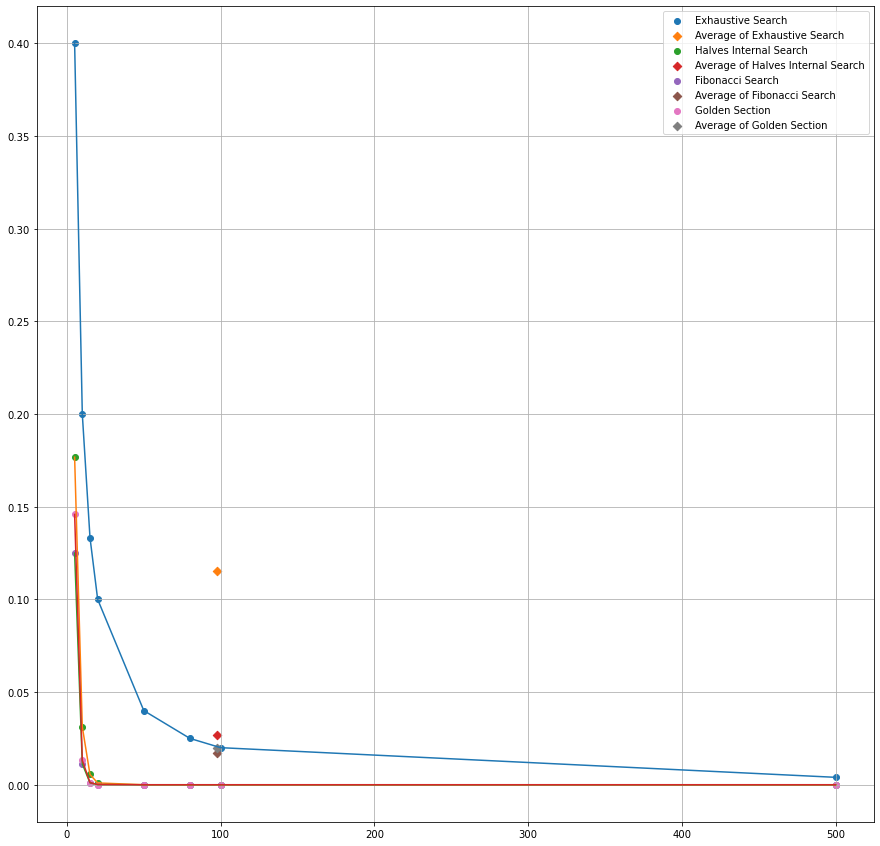

In [346]:
fig, ax = plt.subplots(figsize=(15,15))
Xpoints = list(Reducciones1.columns)[:-1]
labels = list(Reducciones1["Name"])
for i in range(4):
    ax.scatter(Xpoints,Reducciones1.loc[i][:-1], label=labels[i])
    ax.scatter(sum(Xpoints)/len(Xpoints),Reducciones1.loc[i][:-1].sum()/len(Xpoints), marker='D', label="Average of "+labels[i])
    ax.plot(Xpoints,Reducciones1.loc[i][:-1])
    plt.legend()
    
plt.grid()

Fibonacci Search is the best in matters of precision. It reduces the search space very quickly and, even in this average, it outperforms by far the results of Exhaustive Search. Nonetheless, it is the most computationally expensive as many calculations are repeated on each iteration. The Golden Section Search has a very similar performance, as increasing the amount of iterations, it becomes more and more similar to Fibonacci considerably fast and has no repeated calculations on arrays.

For the specific case that we are considering in this exercise even Golden Section Search is better. 

Conclusion: **Golden Section Search is the most eficien in terms of memory and execution time.**